In [1]:
%pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 8.0 MB/s eta 0:00:00


In [3]:
!unzip car.zip

Streaming output truncated to the last 5000 lines.
  inflating: car/train/labels/00000_00003_00026_png.rf.1f6b33373353f896f2c2025ffd264e51.txt  
  inflating: car/train/labels/00000_00003_00026_png.rf.a3b6c2dcd4ee9a8064667b7bb266590b.txt  
  inflating: car/train/labels/00000_00003_00027_png.rf.c1381ed46ee0d7e21877ea3d7ef86127.txt  
  inflating: car/train/labels/00000_00003_00029_png.rf.8e24d2606537779612888c6a06c7043d.txt  
  inflating: car/train/labels/00000_00004_00000_png.rf.45dccdbf08ed12f25d7742d8bf88c102.txt  
  inflating: car/train/labels/00000_00004_00001_png.rf.557d3494b3e633e29069a6f42918334e.txt  
  inflating: car/train/labels/00000_00004_00002_png.rf.3e3e95e1ba16cac885d3de7864a40fb4.txt  
  inflating: car/train/labels/00000_00004_00003_png.rf.9c6ba4d0186eec82a26bddc9a1204efb.txt  
  inflating: car/train/labels/00000_00004_00003_png.rf.a8220aafd1a7f7bba4391bd0a10cdd2f.txt  
  inflating: car/train/labels/00000_00004_00004_png.rf.d4f5ee50324659a47ec7ae664f8ce3a6.txt  
  inflati

In [4]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf


100%|██████████| 6.23M/6.23M [00:00<00:00, 22.8MB/s]



image 1/1 /content/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 416x416 1 traffic light, 376.8ms
Speed: 10.7ms preprocess, 376.8ms inference, 28.1ms postprocess per image at shape (1, 3, 416, 416)


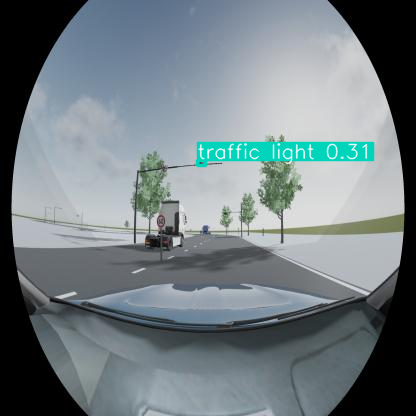

In [7]:
model = YOLO("yolov8n.pt")

image = "car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(416))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [16]:
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

Result_Final_model = Final_model.train(data="car/data.yaml",epochs=10, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15)



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]

Plotting labels to runs/detect/train6/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/train6
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.8015      3.591      1.059         16        416: 100%|██████████| 56/56 [22:01<00:00, 23.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:46<00:00, 15.22s/it]

                   all        801        944       0.13      0.572      0.182      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.6992      2.465      0.956         14        416: 100%|██████████| 56/56 [22:11<00:00, 23.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:45<00:00, 15.08s/it]

                   all        801        944      0.371      0.301      0.324      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.6865      1.986     0.9483         11        416: 100%|██████████| 56/56 [22:03<00:00, 23.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:45<00:00, 15.05s/it]

                   all        801        944      0.462      0.466      0.476      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.6646      1.607     0.9328         10        416: 100%|██████████| 56/56 [22:00<00:00, 23.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:46<00:00, 15.17s/it]

                   all        801        944      0.695      0.614      0.683       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.6493      1.362     0.9206         12        416: 100%|██████████| 56/56 [21:41<00:00, 23.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:44<00:00, 14.88s/it]

                   all        801        944      0.784      0.636      0.726      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.6197      1.159     0.9143          9        416: 100%|██████████| 56/56 [22:03<00:00, 23.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:44<00:00, 14.91s/it]

                   all        801        944      0.808      0.709      0.782      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      0.598     0.9744     0.8988         11        416: 100%|██████████| 56/56 [21:55<00:00, 23.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:45<00:00, 15.03s/it]

                   all        801        944      0.818      0.742      0.818      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.5755     0.8956     0.8876         12        416: 100%|██████████| 56/56 [21:52<00:00, 23.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:45<00:00, 15.01s/it]

                   all        801        944      0.924      0.765      0.864       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.5625     0.7971     0.8807         12        416: 100%|██████████| 56/56 [21:49<00:00, 23.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:46<00:00, 15.27s/it]

                   all        801        944      0.905       0.79      0.874      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.5421     0.7456     0.8756         11        416: 100%|██████████| 56/56 [21:50<00:00, 23.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:44<00:00, 14.92s/it]

                   all        801        944      0.912      0.809      0.882      0.772



10 epochs completed in 3.953 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:35<00:00, 13.65s/it]


                   all        801        944      0.912      0.809      0.882      0.772
           Green Light        801        122       0.93      0.548      0.681      0.391
             Red Light        801        108      0.765      0.572      0.613      0.389
       Speed Limit 100        801         52      0.958      0.876      0.931      0.859
       Speed Limit 110        801         17      0.857      0.824      0.929      0.855
       Speed Limit 120        801         60      0.885        0.9      0.969      0.871
        Speed Limit 20        801         56      0.963      0.934      0.969      0.848
        Speed Limit 30        801         74      0.903      0.932      0.958      0.889
        Speed Limit 40        801         55      0.952      0.836      0.944      0.828
        Speed Limit 50        801         71          1      0.752        0.9       0.81
        Speed Limit 60        801         76      0.957      0.816       0.91      0.845
        Speed Limit 7

In [21]:
image_dir = 'car/test/images'

image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)



0: 416x416 1 Speed Limit 80, 102.8ms
Speed: 1.6ms preprocess, 102.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train612

0: 416x416 1 Red Light, 93.5ms
Speed: 1.5ms preprocess, 93.5ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train613

0: 416x416 1 Speed Limit 50, 100.6ms
Speed: 1.4ms preprocess, 100.6ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train614

0: 416x416 (no detections), 93.5ms
Speed: 1.4ms preprocess, 93.5ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train615

0: 416x416 (no detections), 94.3ms
Speed: 2.3ms preprocess, 94.3ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train616

0: 416x416 1 Red Light, 92.7ms
Speed: 1.3ms preprocess, 92.7ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved 

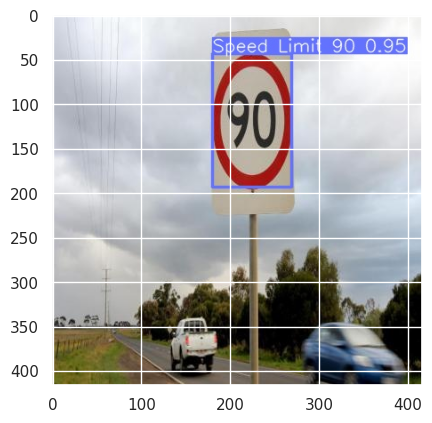

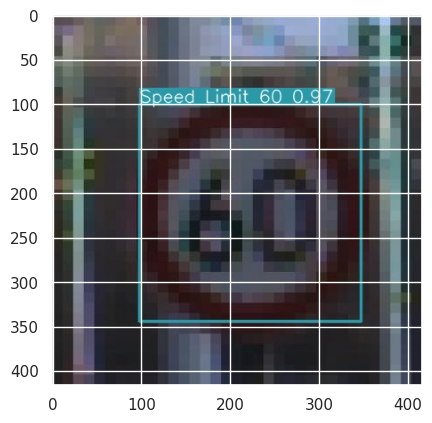

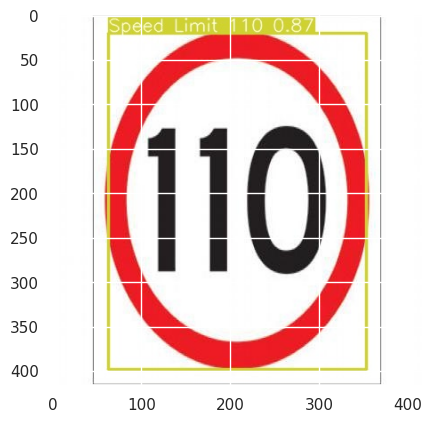

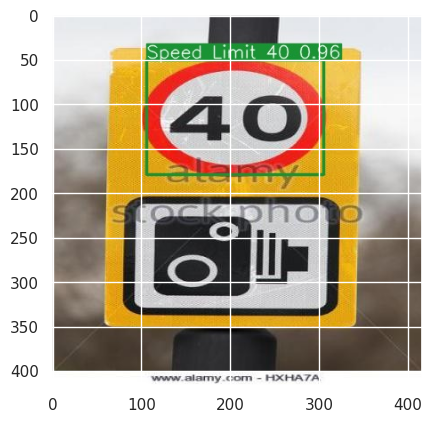

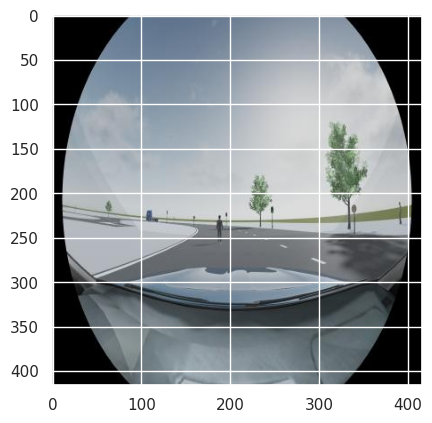

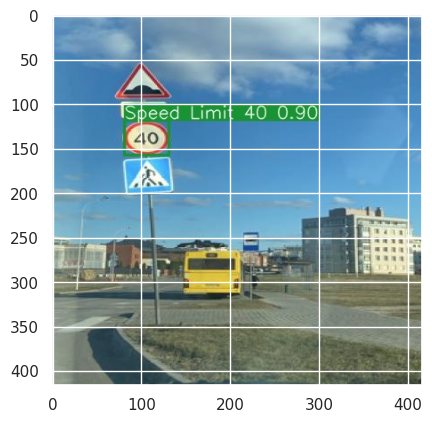

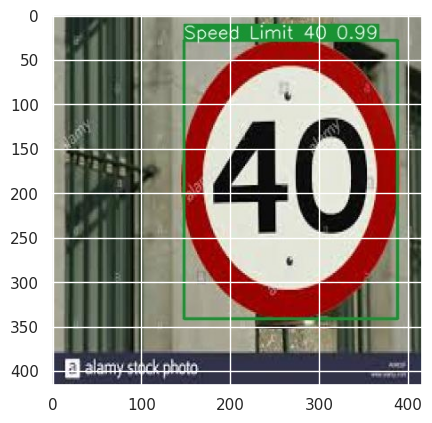

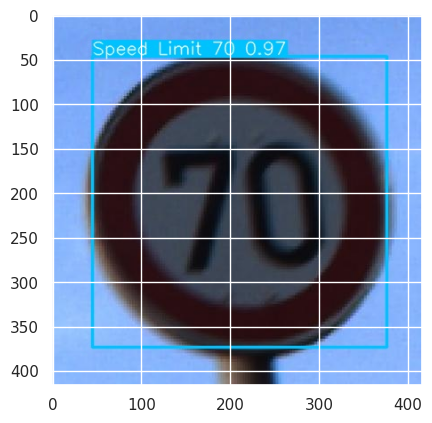

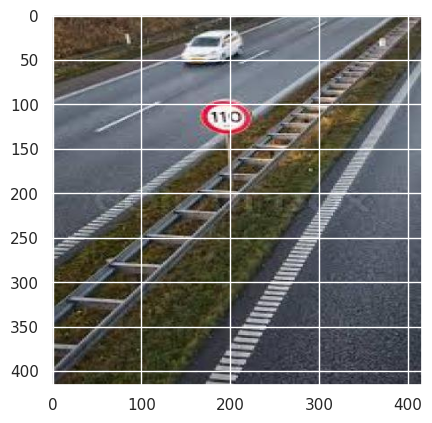

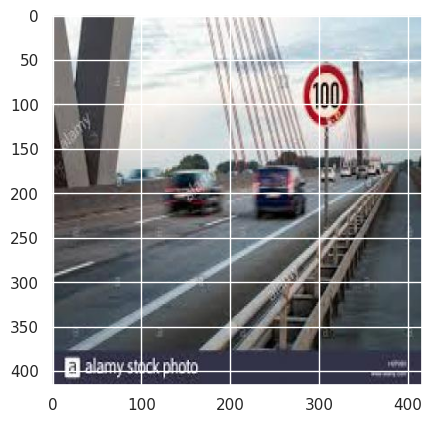

In [24]:
for i in range(2,12):
    plt.imshow(plt.imread(f'runs/detect/train6{i}/image0.jpg'))
    plt.show()
